###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license © 2016 Ryan A. Davis

# Computational Fluid Dynamics Solution to Subsonic-Supersonic Isentropic Flow in a Convergent-Divergent Nozzle using MacCormack's Method

This notebook presents a numerical solution to subsonic-supersonic, isentropic flow in a convergent-divergent nozzle. The figure below shows a schematic of the nozzle.

<img src='nozzle.png'>

We follow the numerical approach in Chapter 7, Section 3 of John D. Anderson's *Computational Fluid Dynamics: The Basics with Applications*. The figure above corresponds to **Figure 7.1** in Anderson's reference.

## Governing Equations

The governing equations are derived with the key assumption of uniform flow properties (density, velocity, temperature, etc.) across any given cross section of the nozzle. Thus, the flow is described as quasi-one-dimensional flow.

**Continuity:**\begin{equation}
\frac{\partial (\rho A)}{\partial t} + \rho A \frac{\partial V}{\partial x} + \rho V \frac{\partial A}{\partial x} + V A \frac{\partial \rho}{\partial x} = 0
\end{equation}

**Momentum:**\begin{equation}
\rho \frac{\partial V}{\partial t} + \rho V \frac{\partial V}{\partial x} = -R \bigg( \rho \frac{\partial T}{\partial x} + T \frac{\partial \rho}{\partial x} \bigg)
\end{equation}

**Energy:**\begin{equation}
\rho c_{\nu} \frac{\partial T}{\partial t} + \rho V c_{\nu} \frac{\partial T}{\partial x} = - \rho R T \bigg[ \frac{\partial V}{\partial x} + V \frac{\partial (\ln A)}{\partial x} \bigg]
\end{equation}

In Anderson's reference, these are equations **7.42**, **7.43**, and **7.44**.

Anderson notes that as a matter of convention, nondimensional variables are generally used for analysis of flow in a nozzle. Accordingly, we introduce the appropriate nondimensional variables.

$\rho' = \frac{\rho}{\rho_0} \ \ \ \ \ \ \ \ \ \ 
V' = \frac{V}{a_0} \ \ \ \ \ \ \ \ \ \ 
T' = \frac{T}{T_0} \ \ \ \ \ \ \ \ \ \ 
x' = \frac{x}{L} \ \ \ \ \ \ \ \ \ \ 
t' = \frac{t}{L\ /\ a_0} \ \ \ \ \ \ \ \ \ \ 
A' = \frac{A}{A^*} \ \ \ \ \ \ \ \ \ \ 
p' = \frac{p}{p_0} = \rho' T' \ \ \ \ \ \ \ \ \ \ 
a' = \frac{a}{a_0} = \sqrt{T'} \ \ \ \ \ \ \ \ \ \ 
a_0 = \sqrt{\gamma R T_0}$

where $\boldsymbol{a_0}$ is the speed of sound in the reservoir and $\boldsymbol{L}$ is the nozzle length.

The nondimensional variables are substituted into the governing equations, and the equations are simplified. The result is a new set of governing equations that use just the nondimensional variables.

**Continuity:**\begin{equation}
\frac{\partial \rho'}{\partial t'} = -\rho' \frac{\partial V'}{\partial x'} - \rho' V' \frac{\partial (\ln A')}{\partial x'} - V' \frac{\partial \rho'}{\partial x'}
\end{equation}

**Momentum:**\begin{equation}
\frac{\partial V'}{\partial t'} = -V' \frac{\partial V'}{\partial x'} - \frac{1}{\gamma} \bigg( \frac{\partial T'}{\partial x'} + \frac{T'}{\rho'} \frac{\partial \rho'}{\partial x'} \bigg)
\end{equation}

**Energy:**\begin{equation}
\frac{\partial T'}{\partial t'} = -V' \frac{\partial T'}{\partial x'} - (\gamma - 1) T' \bigg[ \frac{\partial V'}{\partial x'} + V' \frac{\partial (\ln A')}{\partial x'} \bigg]
\end{equation}

In Anderson's reference, these are Equations **7.46**, **7.48**, and **7.50**.

## Numerical Solution of the Governing Equations using MacCormack's Method

Our approach begins with discretization of the space inside the nozzle into a grid of points. Recall that the governing equations were derived with the assumption of uniform flow properties (density, velocity, temperature, etc.) across any given cross section of the nozzle. Therefore, the grid is simply a line a points.

<img src='discretization.png'>

The figure above depicts the discretization. **Point 1** corresponds to the reservoir, and **Point N** corresponds to the nozzle exit. The grid points are evenly spaced, with a distance $\boldsymbol{\Delta x}$ between points.

This figure corresponds to **Figure 7.5** in Anderson's reference.

### MacCormack's Method: Predictor Step

The spatial derivatives in the governing equations are replaced with forward differences.

**Note:** For simplicity, we no longer use the prime notation for nondimensional variables. It is understood that all of the variables are nondimensional.

\begin{equation}
\bigg( \frac{\partial \rho}{\partial t} \bigg)^t_i = -\rho^t_i \ \frac{V^t_{i+1} - V^t_i}{\Delta x} - \rho^t_i \ V^t_i \ \frac{\ln A_{i+1} - \ln A_i}{\Delta x} - V^t_i \ \frac{\rho^t_{i+1} - \rho^t_i}{\Delta x}
\end{equation}

\begin{equation}
\bigg( \frac{\partial V}{\partial t} \bigg)^t_i = -V^t_i \ \frac{V^t_{i+1} - V^t_i}{\Delta x} - \frac{1}{\gamma} \bigg( \frac{T^t_{i+1} - T^t_i}{\Delta x} + \frac{T^t_i}{\rho^t_i} \ \frac{\rho^t_{i+1} - \rho^t_i}{\Delta x} \bigg)
\end{equation}

\begin{equation}
\bigg( \frac{\partial T}{\partial t} \bigg)^t_i = -V^t_i \ \frac{T^t_{i+1} - T^t_i}{\Delta x} - (\gamma - 1) T^t_i \bigg( \frac{V^t_{i+1} - V^t_i}{\Delta x} + V^t_i \ \frac{\ln A_{i+1} - \ln A_i}{\Delta x} \bigg)
\end{equation}

In Anderson's reference, these are equations **7.51**, **7.52**, and **7.53**.

Predicted values of $\boldsymbol{\rho}$, $\boldsymbol{V}$, and $\boldsymbol{T}$ are denoted $\boldsymbol{\overline{\rho}}$, $\boldsymbol{\overline{V}}$, and $\boldsymbol{\overline{T}}$.

\begin{equation}
\overline{\rho}^{\ t+\Delta t}_{\ i} = \rho^t_i + \bigg( \frac{\partial \rho}{\partial t} \bigg)^t_i \ \Delta t
\end{equation}

\begin{equation}
\overline{V}^{\ t+\Delta t}_{\ i} = V^t_i + \bigg( \frac{\partial V}{\partial t} \bigg)^t_i \ \Delta t
\end{equation}

\begin{equation}
\overline{T}^{\ t+\Delta t}_{\ i} = T^t_i + \bigg( \frac{\partial T}{\partial t} \bigg)^t_i \ \Delta t
\end{equation}

In Anderson's reference, these are equations **7.54**, **7.55**, and **7.56**.

### MacCormack's Method: Corrector Step

The spatial derivatives in the governing equations are replaced with backward differences. The predicted values $\boldsymbol{\overline{\rho}}$, $\boldsymbol{\overline{V}}$, and $\boldsymbol{\overline{T}}$ are used in the equations.

\begin{equation}
\bigg( \frac{\partial\overline{\rho}}{\partial t} \bigg)^{t+\Delta t}_i = -\overline{\rho}^{\ t+\Delta t}_{\ i} \ \frac{\overline{V}^{\ t+\Delta t}_{\ i} - \overline{V}^{\ t+\Delta t}_{\ i-1}}{\Delta x} - \overline{\rho}^{\ t+\Delta t}_{\ i} \ \overline{V}^{\ t+\Delta t}_{\ i} \ \frac{\ln A_i - \ln A_{i-1}}{\Delta x} - \overline{V}^{\ t+\Delta t}_{\ i} \ \frac{\overline{\rho}^{\ t+\Delta t}_{\ i} - \overline{\rho}^{\ t+\Delta t}_{\ i-1}}{\Delta x}
\end{equation}

\begin{equation}
\bigg( \frac{\partial\overline{V}}{\partial t} \bigg)^{t+\Delta t}_i = -\overline{V}^{\ t+\Delta t}_{\ i} \ \frac{\overline{V}^{\ t+\Delta t}_{\ i} - \overline{V}^{\ t+\Delta t}_{\ i-1}}{\Delta x} - \frac{1}{\gamma} \bigg( \frac{\overline{T}^{\ t+\Delta t}_{\ i} - \overline{T}^{\ t+\Delta t}_{\ i-1}}{\Delta x} + \frac{\overline{T}^{\ t+\Delta t}_{\ i}}{\overline{\rho}^{\ t+\Delta t}_{\ i}} \ \frac{\overline{\rho}^{\ t+\Delta t}_{\ i} - \overline{\rho}^{\ t+\Delta t}_{\ i-1}}{\Delta x} \bigg)
\end{equation}

\begin{equation}
\bigg( \frac{\partial\overline{T}}{\partial t} \bigg)^{t+\Delta t}_i = -\overline{V}^{\ t+\Delta t}_{\ i} \ \frac{\overline{T}^{\ t+\Delta t}_{\ i} - \overline{T}^{\ t+\Delta t}_{\ i-1}}{\Delta x} - (\gamma - 1) \  \overline{T}^{\ t+\Delta t}_{\ i} \bigg( \frac{\overline{V}^{\ t+\Delta t}_{\ i} - \overline{V}^{\ t+\Delta t}_{\ i-1}}{\Delta x} + \overline{V}^{\ t+\Delta t}_{\ i} \ \frac{\ln A_i - \ln A_{i-1}}{\Delta x} \bigg)
\end{equation}

In Anderson's reference, these are equations **7.57**, **7.58**, and **7.59**.

The time derivatives in the predictor step are averaged with the time derivatives in the corrector step.

\begin{equation}
\bigg( \frac{\partial \rho}{\partial t} \bigg)_{av} = \frac{1}{2} \ \bigg[ \bigg( \frac{\partial \rho}{\partial t} \bigg)^t_i + \bigg( \frac{\partial\overline{\rho}}{\partial t} \bigg)^{t+\Delta t}_i \bigg]
\end{equation}

\begin{equation}
\bigg( \frac{\partial V}{\partial t} \bigg)_{av} = \frac{1}{2} \ \bigg[ \bigg( \frac{\partial V}{\partial t} \bigg)^t_i + \bigg( \frac{\partial\overline{V}}{\partial t} \bigg)^{t+\Delta t}_i \bigg]
\end{equation}

\begin{equation}
\bigg( \frac{\partial T}{\partial t} \bigg)_{av} = \frac{1}{2} \ \bigg[ \bigg( \frac{\partial T}{\partial t} \bigg)^t_i + \bigg( \frac{\partial\overline{T}}{\partial t} \bigg)^{t+\Delta t}_i \bigg]
\end{equation}

In Anderson's reference, these are equations **7.60**, **7.61**, and **7.62**.

Finally, $\boldsymbol{\rho}$, $\boldsymbol{V}$, and $\boldsymbol{T}$ are found at $\boldsymbol{t+\Delta t}$.

\begin{equation}
\rho^{t+\Delta t}_i = \rho^t_i + \bigg( \frac{\partial \rho}{\partial t} \bigg)_{av} \Delta t
\end{equation}

\begin{equation}
V^{t+\Delta t}_i = V^t_i + \bigg( \frac{\partial V}{\partial t} \bigg)_{av} \Delta t
\end{equation}

\begin{equation}
T^{t+\Delta t}_i = T^t_i + \bigg( \frac{\partial T}{\partial t} \bigg)_{av} \Delta t
\end{equation}

In Anderson's reference, these are equations **7.63**, **7.64**, and **7.65**.

### Time Step

For stability, we use the following equation to determine $\boldsymbol{\Delta t}$.

\begin{equation}
\Delta t = C \ \frac{\Delta x}{a + V}
\end{equation}

Note that we are still using all nondimensional variables. $\boldsymbol{C}$ is the Courant number, and we use $\boldsymbol{C = 0.5}$.

At **time** $\boldsymbol{t}$ and **grid point** $\boldsymbol{i}$, we compute $\boldsymbol{\Delta t^t_i}$.

\begin{equation}
\Delta t^t_i = C \ \frac{\Delta x}{a^t_i + V^t_i}
\end{equation}

At **time** $\boldsymbol{t}$, a different value of $\boldsymbol{\Delta t^t_i}$ can be computed at each grid point. Therefore, we use the minimum across all grid points.

\begin{equation}
\Delta t^t = minimum(\Delta t^t_1, \Delta t^t_2,..., \Delta t^t_i,..., \Delta t^t_N)
\end{equation}

In Anderson's reference, these are equations **7.66**, **7.67**, and **7.69**.

### Boundary Conditions

Our grid has two boundaries - **Point 1** and **Point N**.

**Grid Point 1** is an inflow boundary. The density and temperature are fixed to the reservoir values, $\boldsymbol{\rho_0}$ and $\boldsymbol{T_0}$. The nondimensional values are $\boldsymbol{\rho^t_1 = 1}$ and $\boldsymbol{T^t_1 = 1}$. The velocity is found by linear extrapolation of **Grid Points 2** and **3**.

\begin{equation}
\rho^t_1 = 1
\end{equation}

\begin{equation}
V^t_1 = 2 V^t_2 - V^t_3
\end{equation}

\begin{equation}
T^t_1 = 1
\end{equation}

**Grid Point N** is an outflow boundary. Density, velocity, and temperature are all found by linear extrapolation.

\begin{equation}
\rho^t_N = 2 \rho^t_{N-1} - \rho^t_{N-2}
\end{equation}

\begin{equation}
V^t_N = 2 V^t_{N-1} - V^t_{N-2}
\end{equation}

\begin{equation}
T^t_N = 2 T^t_{N-1} - T^t_{N-2}
\end{equation}

In Anderson's reference, these are equations **7.70**, **7.71**, **7.72a**, **7.72b**, and **7.72c**.

### Nozzle Shape and Initial Conditions

Anderson uses the following equation to define the nozzle shape.

\begin{equation}
A = 1 + 2.2(x - 1.5)^2 \ \ \ \ \ 0 \le x \le 3
\end{equation}

Anderson uses the following equations to define the initial conditions.

\begin{equation}
\rho = 1 - 0.3146x
\end{equation}

\begin{equation}
T = 1 - 0.2314x
\end{equation}

\begin{equation}
V = (0.1 + 1.09x)T^{\frac{1}{2}}
\end{equation}

In Anderson's reference, these are equations **7.73**, **7.74a**, **7.74b**, and **7.74c**.

## Code

In [1]:
import numpy
from matplotlib import pyplot, rcParams
from scipy import optimize
%matplotlib inline
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
nx = 31                       # number of grid points
dx = 3/(nx-1)                 # grid spacing
x = numpy.linspace(0.,3.,nx)  # x grid

In [3]:
import nozzle_flow_numerical_solution

nt = 1400  # number of time-steps

A, rho_i, V_i, T_i = nozzle_flow_numerical_solution.compute_initial_conditions(x)

t_n, rho_n, V_n, T_n = nozzle_flow_numerical_solution.solve_nozzle_flow(nt, nx, dx, A, \
                                                                        rho_i.copy(), V_i.copy(), T_i.copy())

In [4]:
rho = rho_n[-1]  # density at final time-step
V = V_n[-1]      # velocity at final time-step
T = T_n[-1]      # temperature at final time-step
p = rho * T      # pressure at final time-step

Chapter 7, Section 2 in Anderson's reference provides an analytical solution to the steady-state nozzle flow. The code to compute the analytical solution is included in **nozzle_flow_analytical_solution.py**. We compare the numerical results at the final time-step to the steady-state analytical solution.

In [5]:
import nozzle_flow_analytical_solution

M_an, p_an, rho_an, T_an = nozzle_flow_analytical_solution.nozzle_flow_analytical_solution(x, A)

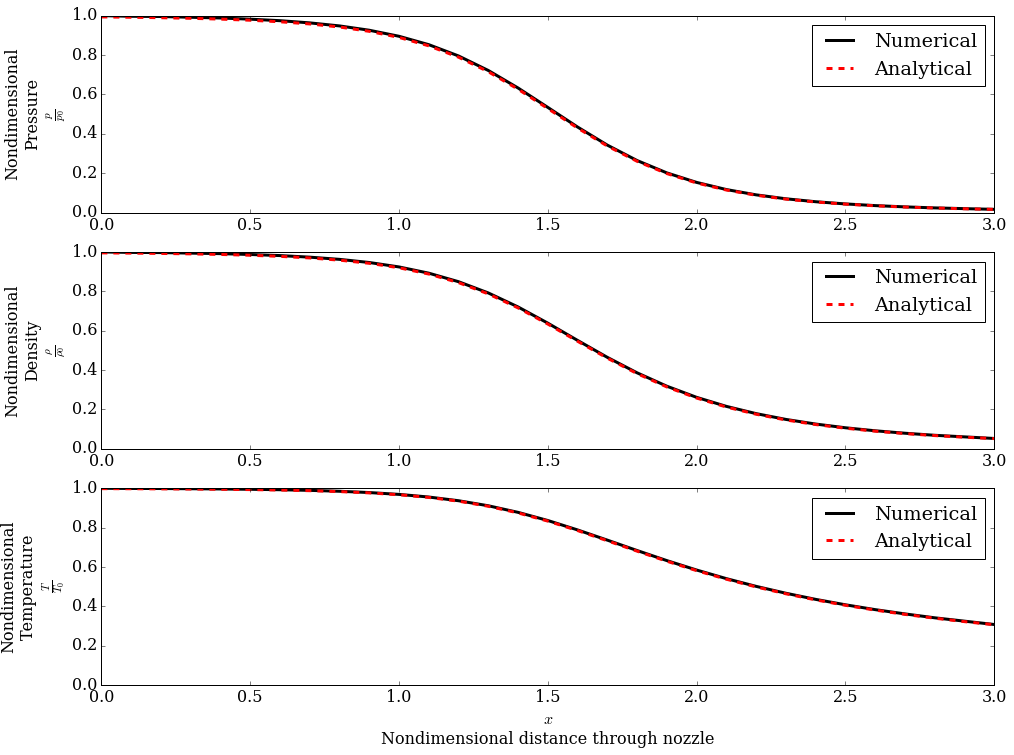

In [6]:
nozzle_flow_numerical_solution.plot_flow_properties(x, p, rho, T, p_an, rho_an, T_an)

In [7]:
# Compute the relative L2 Norm of the error

p_rel_error = nozzle_flow_analytical_solution.L2_rel_error(p, p_an)
rho_rel_error = nozzle_flow_analytical_solution.L2_rel_error(rho, rho_an)
T_rel_error = nozzle_flow_analytical_solution.L2_rel_error(T, T_an)

print('Relative L2 norm of the error in nondimensional pressure: {0:.4f}'.format(p_rel_error))
print('Relative L2 norm of the error in nondimensional density: {0:.4f}'.format(rho_rel_error))
print('Relative L2 norm of the error in nondimensional temperature: {0:.4f}'.format(T_rel_error))

Relative L2 norm of the error in nondimensional pressure: 0.0069
Relative L2 norm of the error in nondimensional density: 0.0054
Relative L2 norm of the error in nondimensional temperature: 0.0030


## Discussion

We can feel confident that our numerical approach has obtained accurate results. Our plots show that the numerical results agree with the analytical results. In additional, we computed the relative $L^2$ Norm of the error. This provides a quantitative indication of the accuracy of our results.

## References

Barba, Lorena A. *Practical Numerical Methods with Python*.
Copyright (c) Barbagroup. https://github.com/numerical-mooc/numerical-mooc

Anderson, John D., Jr. *Computational Fluid Dynamics: The Basics with Applications*. New York: McGraw-Hill, 1995. Print.